In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values


In [19]:
data[0]

array([15, 39], dtype=int64)

In [18]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### define a function to compute a distance between two points aaa and bbb

In [10]:
def compute_distance(a, b):

    dist = np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2) #distance between a and b#

    return dist


In [22]:
compute_distance(data[2],data[1])

75.0066663703967

### define a function to compute a centroid from a given set of points ZZZ

In [28]:
def compute_centroid(Z):
    x,y=0,0
    length=len(Z)
    for point in Z:
        x+=point[0]
        y+=point[1]
    center = [x/length,y/length]#centroid of a set of points in P#
    
    return center


In [31]:
test_arr=[[0,0],[1,2],[2,4]]
compute_centroid(test_arr)

[1.0, 2.0]

### define a function to determine the label of point zzz with a set of centroids MMM

In [77]:
def compute_label(z, M):
    label=0
    dist=1000000
    for i in range(len(M)):
        temp=compute_distance(z,M[i])
        if temp <dist:
            label=i
            dist=temp
        
    return label


In [38]:
compute_label([2,5],test_arr)

2

### define a function to compute the loss with a set of clusters CCC and a set of centroids MMM

In [47]:
def compute_loss(C, M):
    loss=0
    for points, centroid in zip(C,M):
        temp=0
        for point in points:
            temp+=compute_distance(point,centroid)**2
        loss+=temp/len(points)
    
    return loss


In [48]:
compute_loss([[[0,2],[0,3],[0,4]],[[0,1]]],[[0,1],[0,3]])

8.666666666666668

## plot the data points

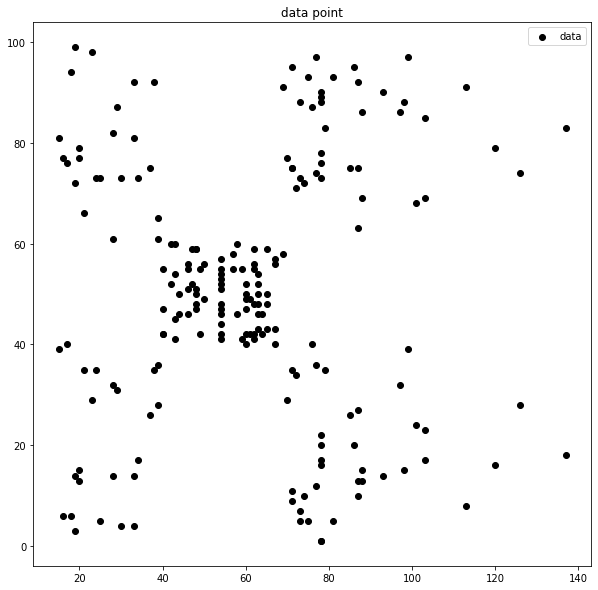

In [73]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

### random initialization

In [131]:
labels = np.random.randint(5,size=[len(data),1])
labels

array([[4],
       [2],
       [3],
       [2],
       [4],
       [0],
       [1],
       [4],
       [3],
       [0],
       [3],
       [1],
       [2],
       [4],
       [3],
       [1],
       [4],
       [0],
       [0],
       [1],
       [2],
       [0],
       [4],
       [4],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [3],
       [1],
       [4],
       [3],
       [4],
       [3],
       [0],
       [1],
       [3],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [3],
       [3],
       [1],
       [3],
       [2],
       [2],
       [2],
       [3],
       [1],
       [4],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
       [3],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [4],
       [1],
    

In [228]:
centroids=np.array([[0,0],[0,0],[0,0],[0,0],[0,0]])
def updateCentroids(centroids, labels):
    for i in range(5):
        idx = np.where(labels==i)
        print(compute_centroid(data[idx[0]]))
        centroids[i]=compute_centroid(data[idx[0]])
   

In [229]:
updateCentroids(centroids, labels)

[60.475, 50.375]
[58.470588235294116, 54.78431372549019]
[60.19047619047619, 53.857142857142854]
[64.51351351351352, 37.486486486486484]
[59.86666666666667, 52.733333333333334]


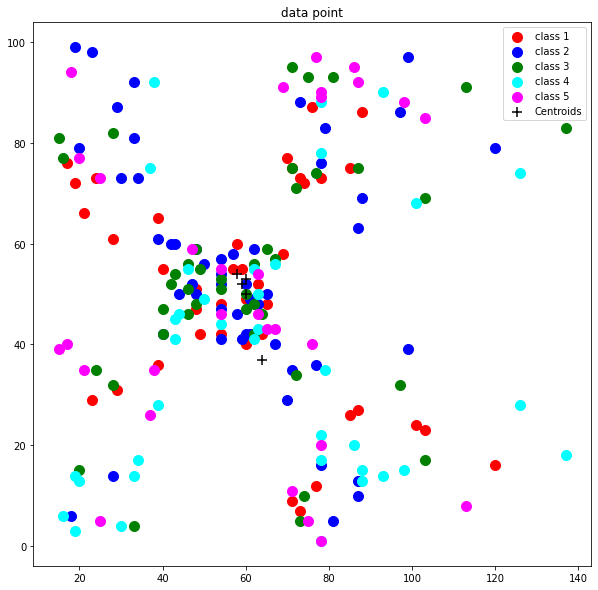

In [230]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

In [227]:
print("labels shape : ", np.shape(labels))
print("centroids shape : ", np.shape(centroids))
print("data shape : ", np.shape(data))


label shape :  (200, 1)
centroids shape :  (5, 2)
data shape :  (200, 2)


### plot the loss curve

In [199]:
loss=np.zeros(100)
for i in range(100):
    loss=compute_loss()
    compute_label
    update_Centroids()

In [243]:
def compute_distance(data, centroid):
    
    dist = (data[:,0]-centroid[0])**2+(data[:,1]-centroid[1])**2 #distance between a and b#

    return dist


In [220]:
def compute_label(centroids):
    temp=np.zeros(len(data),len(centroids))
    for i in range(len(centroids)):
        temp[:,i]=compute_distance(data,centroids[i])
    label=np.argmin(temp)
        
    return label


3


In [237]:
def compute_loss(lables, centroids):
    loss=0
    for i, centroid in zip(range(len(centroids)),centroids):
        temp=0
        idx=np.where(labels==i)

        for point in data[idx[0]]:
            print(point)
            temp+=compute_distance(point,centroid)**2
        loss+=temp/len(idx[0])
    
    return loss


In [242]:
len(data)

200

In [248]:
np.shape(compute_distance(data,[0,1]))
np.shape(data[:,0])
np.shape(data[:,0])
test=np.zeros([len(data),len(centroids)])
test[:,0]=compute_distance(data,[0,1])

In [254]:
np.argmax(test,axis=1)
test

array([[ 1669.,     0.,     0.,     0.,     0.],
       [ 6625.,     0.,     0.,     0.,     0.],
       [  281.,     0.,     0.,     0.,     0.],
       [ 6032.,     0.,     0.,     0.,     0.],
       [ 1810.,     0.,     0.,     0.,     0.],
       [ 5914.,     0.,     0.,     0.,     0.],
       [  349.,     0.,     0.,     0.,     0.],
       [ 8973.,     0.,     0.,     0.,     0.],
       [  365.,     0.,     0.,     0.,     0.],
       [ 5402.,     0.,     0.,     0.,     0.],
       [  530.,     0.,     0.,     0.,     0.],
       [ 9965.,     0.,     0.,     0.,     0.],
       [  596.,     0.,     0.,     0.,     0.],
       [ 6176.,     0.,     0.,     0.,     0.],
       [  544.,     0.,     0.,     0.,     0.],
       [ 6484.,     0.,     0.,     0.,     0.],
       [ 1597.,     0.,     0.,     0.,     0.],
       [ 4666.,     0.,     0.,     0.,     0.],
       [ 1313.,     0.,     0.,     0.,     0.],
       [ 9938.,     0.,     0.,     0.,     0.],
       [ 1732.,     

In [238]:
compute_loss(labels, centroids)

======= label ====== 0
[17 76]
[19 72]
[21 66]
[23 29]
[24 73]
[28 61]
[29 31]
[39 36]
[39 65]
[40 55]
[48 51]
[48 47]
[49 42]
[54 48]
[54 42]
[57 55]
[58 60]
[59 55]
[60 49]
[60 40]
[63 52]
[64 42]
[65 48]
[69 58]
[70 77]
[71 75]
[71  9]
[73  7]
[73 73]
[74 72]
[76 87]
[77 12]
[78 73]
[85 26]
[85 75]
[87 27]
[88 86]
[101  24]
[103  23]
[120  16]
======= label ====== 1
[18  6]
[19 99]
[20 79]
[23 98]
[28 14]
[29 87]
[30 73]
[33 92]
[33 81]
[34 73]
[39 61]
[40 42]
[42 60]
[43 60]
[44 50]
[47 52]
[48 59]
[48 50]
[50 56]
[54 47]
[54 54]
[54 52]
[54 41]
[54 57]
[57 58]
[58 46]
[59 41]
[60 42]
[60 52]
[61 42]
[61 49]
[62 59]
[63 48]
[65 50]
[67 40]
[70 29]
[71 35]
[73 88]
[77 36]
[78 76]
[78 16]
[79 83]
[81  5]
[87 63]
[87 13]
[87 10]
[88 69]
[97 86]
[99 39]
[99 97]
[120  79]
======= label ====== 2
[15 81]
[16 77]
[20 15]
[24 35]
[28 82]
[28 32]
[33  4]
[40 47]
[40 42]
[42 52]
[43 54]
[46 51]
[46 46]
[46 56]
[48 48]
[48 59]
[49 55]
[54 53]
[54 51]
[60 47]
[60 50]
[62 48]
[62 56]
[62 42]
[64

6722.065614353849

# outputs

## 1. Plot the data points [1pt]

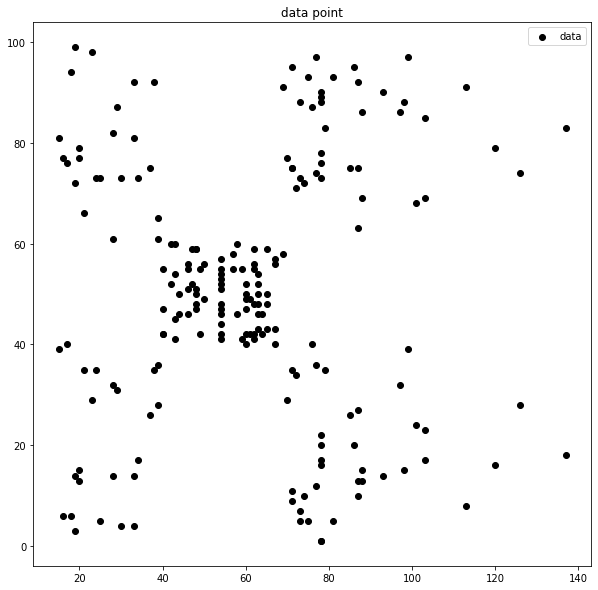

In [76]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

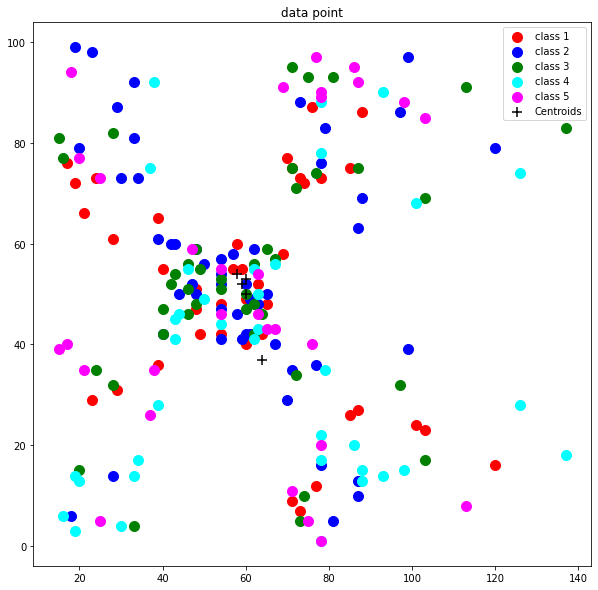

In [217]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]